In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


# Setting up the environment and loading data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [62]:
data=pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
##This data has information about customers visiting a mall
##It is unstructured therefore we will use a clustering technique

In [63]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [65]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [66]:
data.duplicated().any()
#no nulls and no duplicates

False

# EDA

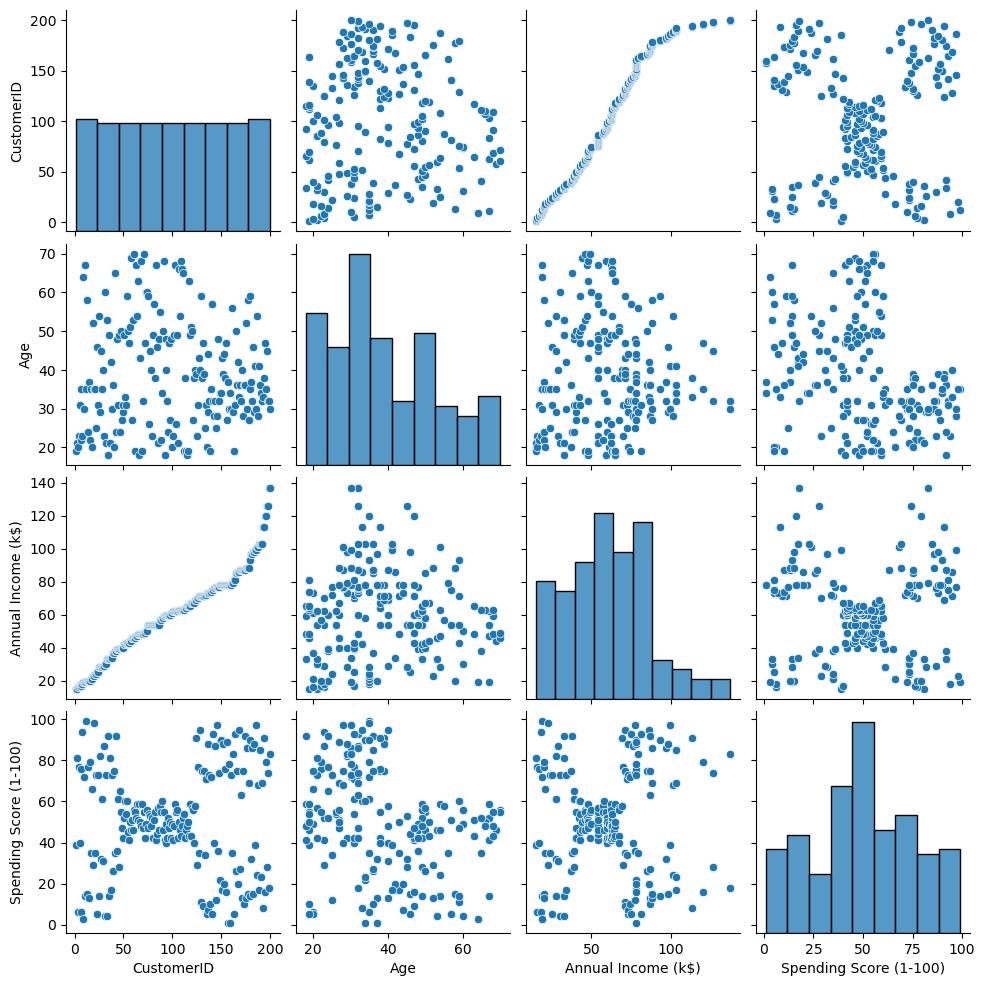

In [67]:
sns.pairplot(data)
#our clusters will be 5(k)

In [68]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

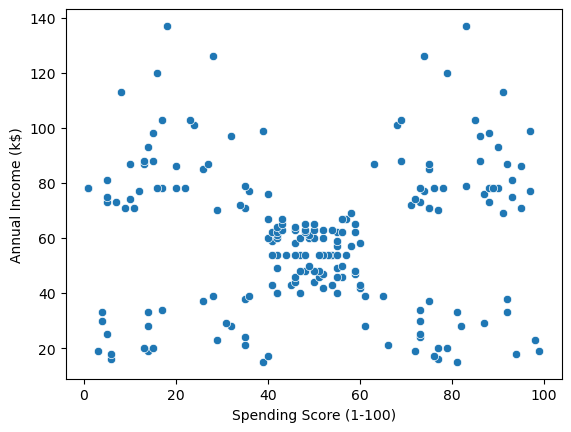

In [69]:
sns.scatterplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=data)

In [70]:
from sklearn.preprocessing import LabelEncoder

# Initialize the OneHotEncoder object
encoder = LabelEncoder()

# Fit and transform the data to perform one-hot encoding
data['Genre'] = encoder.fit_transform(data['Genre'])

In [71]:
df=data.drop('CustomerID',axis=1)

In [72]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


/tmp/ipykernel_32/452057375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Genre'])


<Axes: xlabel='Genre', ylabel='Density'>

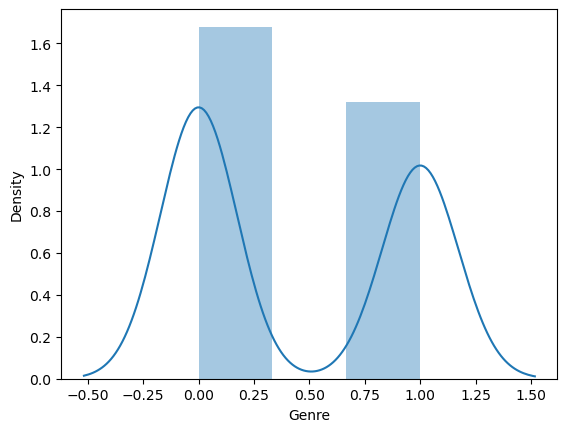

In [73]:
sns.distplot(data['Genre'])
#the column is balanced

In [74]:
from sklearn.cluster import KMeans

# and 'k' is the number of clusters you want to create

# Initialize the KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans model
kmeans.fit(data)

# Retrieve the cluster labels for each data point
labels = kmeans.labels_

# Retrieve the centroids of the clusters
centroids = kmeans.cluster_centers_


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
centroids

array([[ 25.16666667,   0.41666667,  25.83333333,  26.95833333,
         77.79166667],
       [164.        ,   0.52777778,  40.80555556,  87.91666667,
         17.88888889],
       [ 93.04615385,   0.43076923,  42.96923077,  57.93846154,
         49.44615385],
       [ 34.05555556,   0.36111111,  44.80555556,  32.19444444,
         30.88888889],
       [162.        ,   0.46153846,  32.69230769,  86.53846154,
         82.12820513]])

In [76]:
labels

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

/tmp/ipykernel_32/3324093677.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'],cmap='rainbow')


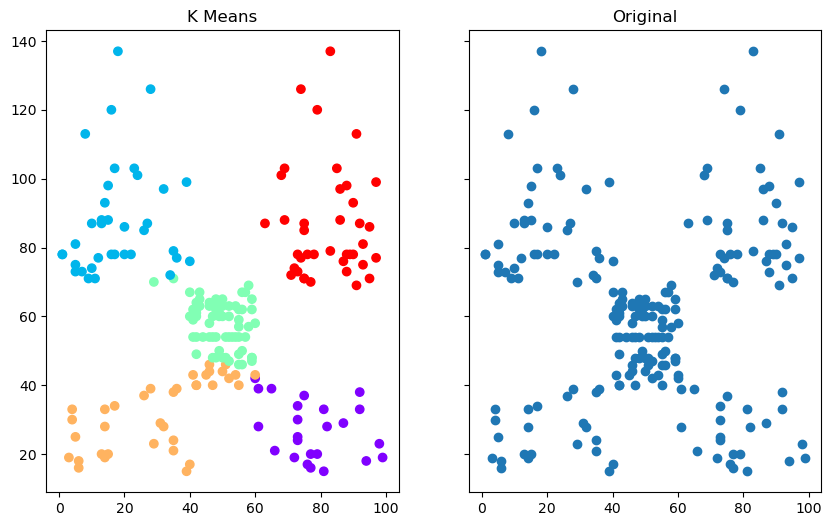

In [77]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'],cmap='rainbow')

# Evaluation

In [78]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)
##the closer the score is to 1,the better the perfomance

Silhouette Score: 0.3877640814536855
